<a href="https://colab.research.google.com/github/datenzauberai/tmp/blob/main/Technologie_Praktikum_MNIST_und_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# Keras für neuronale Netzwerke

In diesem Notebook wirst Du ein neuronales Netz trainieren, das handgeschriebene Ziffern erkennen kann. Die Bilder dafür nehmen wir aus dem MNIST-Datensatz.

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Der Datensatz besteht aus 60.000 Bildern mit jeweils 28x28 Pixeln für das Training. Weil MNIST auch für Benchmarks genutzt wird, gibt es schon eine Trennung in einen Trainings- und Testdatensatz.

In [3]:
train_images.shape

(60000, 28, 28)

Welche Ziffer jedes Beispielbild darstellt steht in den Labels, von denen entsprechend auch 60.000 gibt.

In [4]:
len(train_labels)

60000

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Überprüfe jetzt Du, wie viele Bilder mit welcher Größe im Datensatz für den Test sind.

In [6]:
# DEIN CODE

## Normalisierung der Bilder

Die Bilder aus den Datensätzen können wir ausgeben.

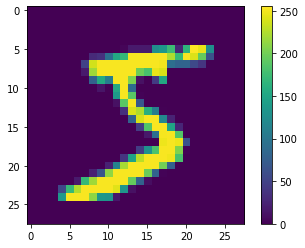

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In der Darstellung ist zu sehen, dass die Werte für das Bild von 0 bis 255 reichen. Normalerweise werden die Eingabedaten (in diesem Fall die Pixeldaten) für ein neuronales Netz aber auf einen bestimmten Wertebereich normalisiert (z.B. 0-1), bevor sie in das Netz gegeben werden. Das geht z.B. mit dem folgenden Code. Achte auf den `colorbar` rechts vom Bild, der jetzt den neuen Wertebereich zeigt.

In [8]:
train_images_normalized = train_images/255
test_images_normalized = test_images/255

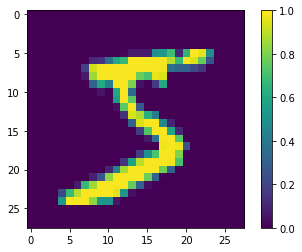

In [31]:
plt.figure()
plt.imshow(train_images_normalized[0])
plt.colorbar()
plt.show()

Mehrere Bilder lassen sich auch ausgeben.

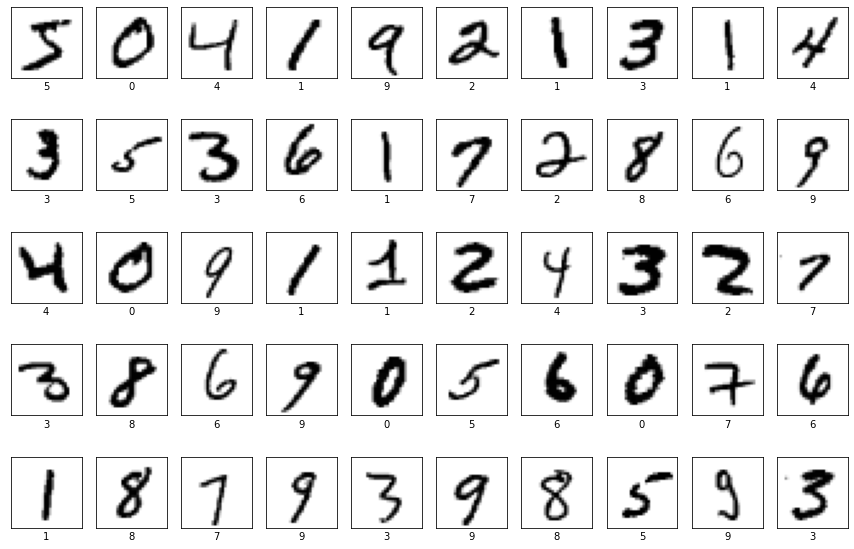

In [35]:
plt.figure(figsize=(15,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_normalized[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()


## Ein neuronales Netz zur Handschrifterkennung bauen

Du kannst jetzt ein einfaches neuronales Netz bauen. Das brauchen wir die Erkennung nicht furchtbar viele Schichten mit Neuronen.

In [11]:
inputs = keras.Input(shape=(28, 28, 1)) # die Eingabe-Schicht für 28x28 Pixel

In [12]:
x = layers.Flatten()(inputs) # wir klopfen die 28x28 Pixel auf 1x784 Pixel flach

Jetzt kommen die versteckten Schichten. Wir nehmen eine Schicht, die 128 Neuronen umfasst. Du kannst die Variable `x` wiederverwenden und brauchst nicht für jede Schicht eine eigene Variable.

In [13]:
x = layers.Dense(128, activation="relu")(x)

Die Ausgabeschicht bekommt für jede Klasse ein Neuron und die Soft-Max-Aktivierungsfunktion.

In [14]:
outputs = layers.Dense(10, activation="softmax")(x)

In [15]:
model = keras.Model(inputs, outputs)

Eine Zusammenfassung des Modells inklusive der Anzahl der zu lernenden Parameter gibt die Methode `summary` aus.

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Das Modell lässt sich auch als Diagramm ausgeben.

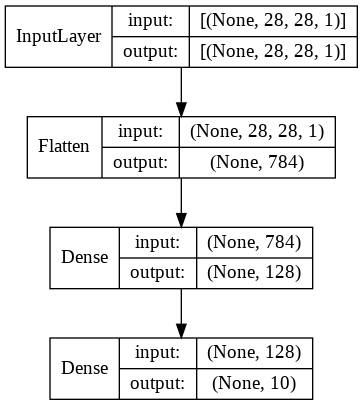

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

Du kannst an dieser Stelle später mit der Anzahl der Layers, der Anzahl der Neuronen in der Schicht und der Aktivierungsfunktion experimentieren. Weitere Aktivierungsfunktionen sind z.B. `sigmoid` oder `tanh`.

Du kannst später auch ein einfaches CNN mit den folgenden Zutaten ausprobieren. Achte darauf, dass in diesem Fall der Input nicht flachgeklopft werden darf, sondern zweidimensional bleibt. Nach den Convolutional-Layern kann dann wieder flachgeklopft werden. 
* `layers.Conv2D(32, kernel_size=(3,3), activation="relu")`
* `layers.MaxPooling2D(pool_size=(2, 2))`

In [36]:
# DEIN CODE (aber erst später wenn Du schon trainiert und validiert hast)

## Modell trainieren



Zum Trainieren des Modells gibt es verschiedene Optimierer. *Adam* ist ein Optimierer, der oft gut funktioniert.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images_normalized, train_labels, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 2ms/step - loss: 0.6179 - accuracy: 0.8296
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.1795 - accuracy: 0.9499
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 0.1222 - accuracy: 0.9656


## Modell validieren

Die Vorhersagen auf den Trainingsdaten sehen sehr gut aus. Wie steht es mit den Test-Daten?

In [20]:
model.evaluate(test_images_normalized, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9673


[0.1113436296582222, 0.9672999978065491]

## Vorhersagen machen und Fehler untersuchen

Vorhersagen lassen sich mit der Methode `predict` machen.

In [21]:
predictions = model.predict(test_images_normalized)

Die Methode liefert für jedes Test-Bild den Output-Vektor des neuronalen Netzes zurück. Das Output-Neuron mit der höchsten Aktivierung entspricht der Vorhersage des Netzes.

In [22]:
print(predictions[0:2])

[[0.    0.    0.003 0.007 0.    0.    0.    0.989 0.    0.   ]
 [0.    0.003 0.992 0.003 0.    0.    0.    0.    0.    0.   ]]


Die Vorhersage lässt sich deshalb mit der Funktion `np.argmax` ableiten.

In [23]:
predictions = np.argmax(predictions, axis=1)
predictions[0:2]

array([7, 2])

Die falschen Vorhersagen lassen sich jetzt durch einen Vergleich von `predictions` mit den `test_labels` ermitteln. 

In [24]:
np.where(predictions != test_labels)

(array([   8,  247,  259,  321,  340,  445,  447,  448,  495,  565,  578,
         582,  591,  619,  628,  659,  684,  691,  707,  717,  720,  740,
         760,  810,  844,  846,  877,  881,  938,  947,  951,  965, 1014,
        1032, 1039, 1044, 1114, 1166, 1173, 1181, 1182, 1191, 1192, 1194,
        1198, 1226, 1232, 1242, 1247, 1260, 1289, 1319, 1326, 1337, 1393,
        1414, 1429, 1444, 1458, 1494, 1500, 1522, 1530, 1531, 1549, 1553,
        1609, 1621, 1681, 1709, 1717, 1721, 1754, 1790, 1800, 1822, 1828,
        1850, 1878, 1901, 1941, 1981, 1984, 1987, 2004, 2016, 2024, 2035,
        2040, 2043, 2044, 2053, 2070, 2098, 2109, 2118, 2129, 2130, 2135,
        2182, 2185, 2186, 2189, 2215, 2224, 2266, 2272, 2293, 2369, 2387,
        2406, 2408, 2414, 2422, 2433, 2454, 2488, 2598, 2607, 2618, 2648,
        2654, 2730, 2760, 2771, 2810, 2812, 2877, 2896, 2939, 2945, 3005,
        3030, 3060, 3073, 3117, 3130, 3206, 3251, 3284, 3289, 3333, 3376,
        3422, 3490, 3503, 3520, 3549, 

Predicted: 0
Truth: 9


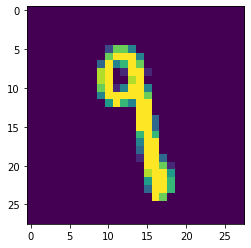

In [29]:
i = 3503
print("Predicted: %s" % np.argmax(predictions[i]))
print("Truth: %s" % test_labels[i])
plt.figure()
plt.imshow(test_images_normalized[i])
plt.grid(False)
plt.show()

Hier kannst Du jetzt eine Übersicht mit allen falschen Vorhersagen ausgeben. Nutze dafür den Code von oben, der 50 Bilder ausgegeben hat. Passe ihn so an, dass nur die falschen Vorhersagen ausgegeben werden und die Bilder mit dem wahren und dem falsch vorhergesagtem Label versehen werden.

In [26]:
# DEIN CODE

## Weiterführende Beispiele

Hier gibt es mehr Futter, wenn dir langweilig ist: https://keras.io/examples/, Du kannst z.B. versuchen das folgende Netz hier im Notebook nachzubauen https://keras.io/examples/vision/mnist_convnet/